## Observations and Insights 

In [1]:
#OBSERVATIONS/INFERENCES: 

#1) The box plot showed that there was an outlier in the results for those mice treated with the drug Infubinol. 
#2) The number of mice that were put onto the Drugs Capomulin and Ramicane was larger than the number of mice for the other drug regimens.
#3) The results for Ceftamin had the largest interquartile range, at 15.58
#4) Mouse b128 (treated with Capomulin) showed a significant decrease in tumor volume as time increased. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_metadata_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
combined_metadata_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_id = combined_metadata_df["Mouse ID"].unique()
len(mice_id)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_count = combined_metadata_df.groupby("Mouse ID")[["Timepoint"]].count()
id_count
find_duplicate = id_count.loc[id_count["Timepoint"] > 10]
find_duplicate

,Timepoint
Mouse ID,
g989,13


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_metadata_df.loc[combined_metadata_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata_df = combined_metadata_df.drop(range(908, 921))
check = metadata_df.loc[metadata_df["Mouse ID"] == "g989"]
check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_id_check = metadata_df["Mouse ID"].unique()
len(mice_id_check)

248

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_regimen = metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_regimen = metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_regimen = metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_regimen = metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_regimen = metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#put all series together

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"mean", "median", "var", "std", "sem"})
# This method produces everything in a single groupby function
summary_table

,mean,sem,median,std,var
Drug Regimen,,,,,
Capomulin,40.675741,0.329346,41.557809,4.994774,24.947764
Ceftamin,52.591172,0.469821,51.776157,6.268188,39.290177
Infubinol,52.884795,0.492236,51.820584,6.567243,43.128684
Ketapril,55.235638,0.603860,53.698743,8.279709,68.553577
Naftisol,54.331565,0.596466,52.509285,8.134708,66.173479
Placebo,54.033581,0.581331,52.288934,7.821003,61.168083
Propriva,52.320930,0.544332,50.446266,6.622085,43.852013
Ramicane,40.216745,0.320955,40.673236,4.846308,23.486704
Stelasyn,54.233149,0.573111,52.431737,7.710419,59.450562


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

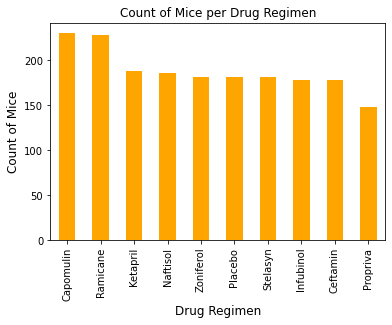

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

groupbydata = metadata_df["Drug Regimen"].value_counts()
groupbydata.plot(kind = "bar", facecolor = "orange")
plt.title("Count of Mice per Drug Regimen")
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Count of Mice", fontsize = 12)


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

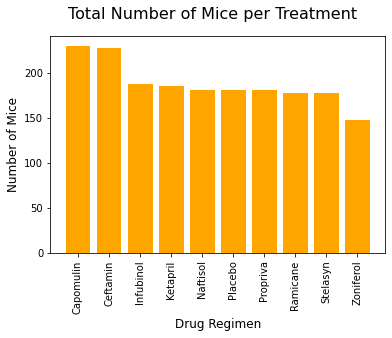

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
xaxis = np.arange(len(summary_table))
ticklocations = [value for value in xaxis]

fig = plt.bar(xaxis,groupbydata, facecolor = "orange")
plt.xticks(ticklocations, list(summary_table.index), rotation = "vertical")
plt.suptitle("Total Number of Mice per Treatment", fontsize = 16)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)

plt.show

<AxesSubplot:title={'center':'Distribution of Female vs Male Mice'}, ylabel='Sex'>

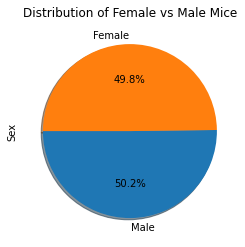

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df = mouse_metadata["Sex"].value_counts()
df.plot.pie(startangle = 180, autopct = "%1.1f%%", shadow = True, title = "Distribution of Female vs Male Mice")



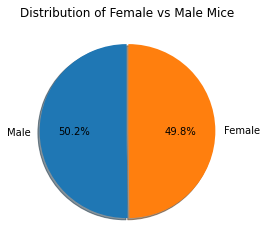

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
variable = mouse_metadata["Sex"].value_counts() 
labels = mouse_metadata["Sex"].unique()
explode = (0.01, 0.01)
plt.pie(variable, autopct = "%1.1f%%", startangle = 90, shadow = True, explode = explode, labels = labels)
plt.title("Distribution of Female vs Male Mice") 
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = combined_metadata_df.loc[(combined_metadata_df["Drug Regimen"] == "Capomulin") | (combined_metadata_df["Drug Regimen"] == "Ramicane") | (combined_metadata_df["Drug Regimen"] == "Infubinol") | (combined_metadata_df["Drug Regimen"] =="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_v = treatment_data.groupby(["Mouse ID"])["Timepoint"].max()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_v = pd.merge(final_tumor_v, treatment_data, how = "left", on = ["Mouse ID", "Timepoint"])
merged_tumor_v


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

#  Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add to subset 
    # Determine outliers using upper and lower bounds
    
for i, treatment in enumerate(treatments):
    filtered_df = merged_tumor_v.loc[(merged_tumor_v["Drug Regimen"] == treatment)]
    empty_list.append(filtered_df["Tumor Volume (mm3)"])
        
    Q1 = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - (1.5 * IQR),4)
    upper_bound = round(Q3 + (1.5 * IQR),4)
    
    print(f"{treatment} IQR Tumor Volume (mm3) Data:")
    print(f"Lower quartile: {Q1}")
    print(f"Upper quartile: {Q3}")
    print(f"Interquartile range: {IQR}")
    print(f"Values below {lower_bound} and above {upper_bound} would be considered outliers")
    print(f"-----------------")

Capomulin IQR Tumor Volume (mm3) Data:
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range: 7.781863460000004
Values below 20.7046 and above 51.832 would be considered outliers
-----------------
Ramicane IQR Tumor Volume (mm3) Data:
Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile range: 9.098536719999998
Values below 17.9127 and above 54.3068 would be considered outliers
-----------------
Infubinol IQR Tumor Volume (mm3) Data:
Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile range: 11.477135160000003
Values below 36.8329 and above 82.7414 would be considered outliers
-----------------
Ceftamin IQR Tumor Volume (mm3) Data:
Lower quartile: 48.72207785
Upper quartile: 64.29983003
Interquartile range: 15.577752179999997
Values below 25.3554 and above 87.6665 would be considered outliers
-----------------


In [24]:
empty_list

[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

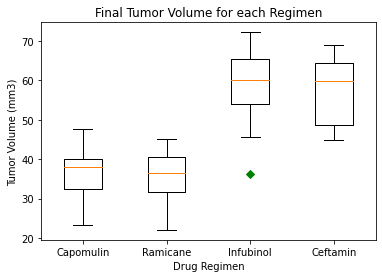

In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(empty_list, labels = treatments, notch = 0, sym = "gD")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume for each Regimen")
plt.show()

## Line and Scatter Plots

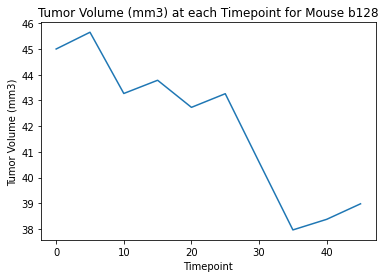

In [87]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_line = metadata_df[metadata_df["Drug Regimen"] == "Capomulin"]
df_line = df_line.reset_index(drop = True)
df_line = df_line.groupby(["Mouse ID", "Timepoint"])["Tumor Volume (mm3)"].max()
df_line["b128"].plot(kind = "line",  label = "b128", x = "Timepoint", y = "Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) at each Timepoint for Mouse b128")
plt.show()

<AxesSubplot:title={'center':'Mouse Weight vs Average Tumor Volume (mm3) for Capomulin Regimen'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

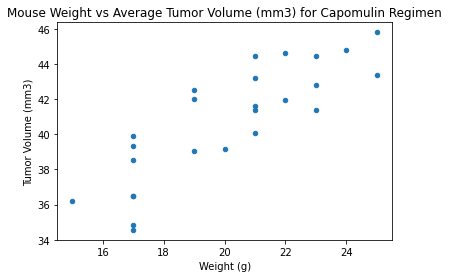

In [89]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_scatter = metadata_df.copy()
df_scatter = df_scatter.loc[df_scatter["Drug Regimen"] == "Capomulin"]
df_scatter = df_scatter.groupby(["Mouse ID", "Weight (g)"], as_index = False).agg("mean")
df_scatter.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", title = 'Mouse Weight vs Average Tumor Volume (mm3) for Capomulin Regimen')


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [19]:
capomulin_df = merged_tumor_v.loc[merged_tumor_v["Drug Regimen"] == "Capomulin"]
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)


9     39.958448
12    38.207980
24    31.206107
25    34.707043
26    39.958448
32    43.459384
33    36.457512
34    41.708916
35    38.207980
45    38.207980
49    34.707043
51    31.206107
53    34.707043
64    45.209853
65    31.206107
68    45.209853
70    31.206107
72    41.708916
73    31.206107
78    31.206107
82    38.207980
83    41.708916
88    38.207980
90    27.705170
96    31.206107
Name: Weight (g), dtype: float64


In [20]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 1.75x +1.45


The r-value is: 0.7686134812139


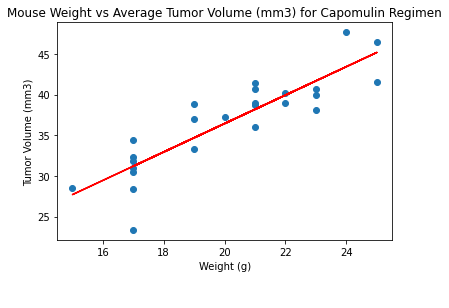

In [92]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (mm3) for Capomulin Regimen')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()